# Decision Tree Classification Implementaion using sklearn 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
url="https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv"
titanic_data=pd.read_csv(url)
titanic_data.head()

,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,1,1st,Male,Child,No,0
1,2,2nd,Male,Child,No,0
2,3,3rd,Male,Child,No,35
3,4,Crew,Male,Child,No,0
4,5,1st,Female,Child,No,0


In [8]:
titanic_data=titanic_data.iloc[:,1:]

In [10]:
titanic_data.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [ ]:
# Data Pre processing

In [11]:
titanic_data.Class.unique()

array(['1st', '2nd', '3rd', 'Crew'], dtype=object)

In [13]:
titanic_data.Class=titanic_data.Class.map({'1st':0, '2nd':1, '3rd':2, 'Crew':3})

In [15]:
titanic_data.Sex.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
titanic_data.Sex=titanic_data.Sex.map({'Male':0, 'Female':1})

In [18]:
titanic_data.Age.unique()

array(['Child', 'Adult'], dtype=object)

In [19]:
titanic_data.Age=titanic_data.Age.map({'Child':0, 'Adult':1})

In [21]:
titanic_data.Survived.unique()

array(['No', 'Yes'], dtype=object)

In [22]:
titanic_data.Survived=titanic_data.Survived.map({'No':0, 'Yes':1})

In [23]:
titanic_data.head()

,Class,Sex,Age,Survived,Freq
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,35
3,3,0,0,0,0
4,0,1,0,0,0


In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Class     32 non-null     int64
 1   Sex       32 non-null     int64
 2   Age       32 non-null     int64
 3   Survived  32 non-null     int64
 4   Freq      32 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB


In [25]:
# 2. select x and y
X=titanic_data[['Class','Sex','Age','Freq']]
y=titanic_data[['Survived']]

In [28]:
#3. train,test split  default split is 75 % training and 25% test
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=123,stratify=titanic_data[['Survived']])

In [45]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [31]:
# Attribute of the model
model.classes_

array([0, 1], dtype=int64)

In [32]:
model.max_features_

4

In [33]:
model.n_classes_

2

In [34]:
model.n_features_in_

4

In [35]:
model.feature_names_in_

array(['Class', 'Sex', 'Age', 'Freq'], dtype=object)

In [36]:
model.n_outputs_

1

In [39]:
model.tree_

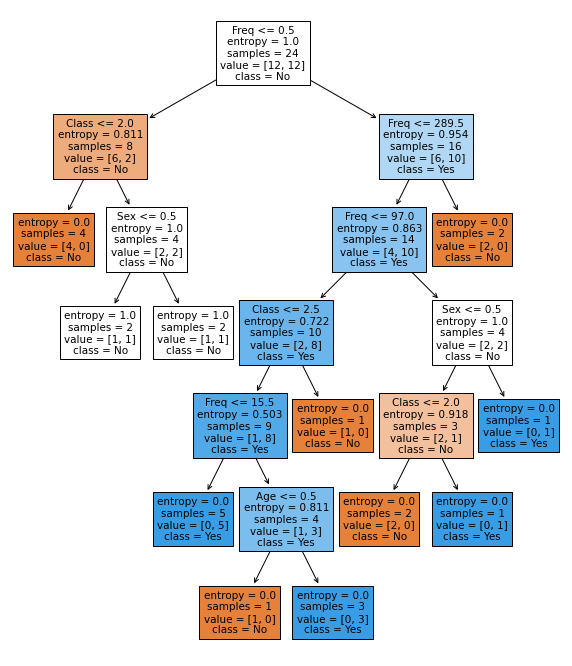

In [46]:
# View the Decision Tree
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(model,class_names=['No','Yes'],feature_names=['Class', 'Sex', 'Age', 'Freq'],filled=True)
plt.show()

In [48]:
# model performance evaluation
model.score(X_test,y_test)

0.5

In [52]:
# prediction the new data
#['Class', 'Sex', 'Age', 'Freq']
model.predict([[1,0,1,50]])[0]

1

In [55]:
if model.predict([[3,0,1,50]])[0]==1:
    print("Survived")
else:
    print(" Not Survived")

 Not Survived


In [9]:
pd.get_dummies(titanic_data)

,Freq,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,1,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,1,0,1,1,0
2,35,0,0,1,0,0,1,0,1,1,0
3,0,0,0,0,1,0,1,0,1,1,0
4,0,1,0,0,0,1,0,0,1,1,0
5,0,0,1,0,0,1,0,0,1,1,0
6,17,0,0,1,0,1,0,0,1,1,0
7,0,0,0,0,1,1,0,0,1,1,0
8,118,1,0,0,0,0,1,1,0,1,0
9,154,0,1,0,0,0,1,1,0,1,0
